In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib

df=pd.read_csv("burnout_dataset.csv")
df.head(5)

,sleep_hours,screen_time,physical_activity,mood_level,assignments,caffeine,social_interaction,burnout_risk
0,7,4,2,5,1,1,2,0
1,5,8,0,2,3,3,0,2
2,5,9,0,2,8,3,0,2
3,7,3,2,5,1,1,2,0
4,7,3,1,5,0,1,5,0


In [10]:
X = df.drop("burnout_risk", axis=1)
y = df["burnout_risk"]

In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:

# Train RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
 model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Healthy", "Mild Burnout", "High Burnout"],zero_division=1))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 100.0 %

📊 Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        37
Mild Burnout       1.00      1.00      1.00        43
High Burnout       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

🧮 Confusion Matrix:
 [[37  0  0]
 [ 0 43  0]
 [ 0  0 40]]


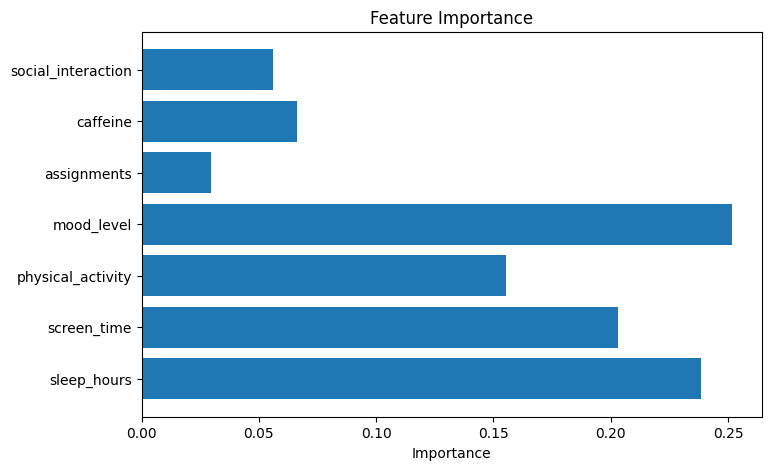

In [14]:


features = X.columns
importances = model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [ ]:
joblib.dump(model, 'burnout_model_dt.joblib')  # Save RandomForest model

print("💾 Model saved as 'burnout_model_dt.joblib'")


💾 Model saved as 'burnout_rf_model.joblib'


In [16]:
print("Predicted labels:", np.unique(y_pred))


Predicted labels: [0 1 2]
